# Linear Regression

Regression is a **supervised learning technique** used to model the relationship between a **dependent variable (response, Y)** and one or more **independent variables (predictors, X)**.

Regression is used to **predict numerical values**, unlike classification, which predicts discrete labels.

#### The Intuition Behind Linear Regression

Linear Regression assumes that the relationship between the predictor (X) and response (Y) can be modeled using a **straight line**:

$Y = \beta_0 + \beta_1X + \varepsilon$

Where:
- Y = Dependent variable (what we want to predict)
- X = Independent variable (feature used for prediction)
- $\beta_0$ = Intercept (value of Y when X = 0)
- $\beta_1$ = Slope (change in Y for a unit increase in X)
- $\varepsilon$ = Error term (captures randomness or noise in data)

#### Practical Example

If you were predicting **salary** (Y) based on **years of experience** (X), the equation might be:

$\text{Salary} = 30,000 + 5,000 \times \text{Experience}$

This means:
- A person with **0 years of experience** earns **$30,000** (intercept)
- Every additional **year of experience** increases salary by **$5,000** (slope)

### Visualizing the Relationship

Let’s visualize linear regression with an example.

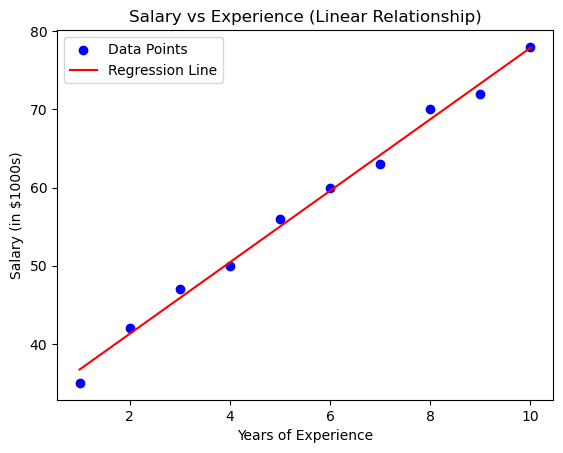

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Years of experience
Y = np.array([35, 42, 47, 50, 56, 60, 63, 70, 72, 78])  # Salary in thousands

# Plotting data
plt.scatter(X, Y, color='blue', label="Data Points")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (in $1000s)")
plt.title("Salary vs Experience (Linear Relationship)")

# Draw an approximate regression line (for intuition)
m, b = np.polyfit(X, Y, 1)  # Fit a simple line
plt.plot(X, m*X + b, color='red', label="Regression Line")

plt.legend()
plt.show()

#### Observation:
The red line represents the best-fit line that predicts salary based on experience.

#### How Do We Find the Best Line?

To determine the **optimal values** of $\beta_0$ and $\beta_1$, we use:

$\beta_1 = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sum (X_i - \bar{X})^2}$

$\beta_0 = \bar{Y} - \beta_1 \bar{X}$

where $\bar{X}$ and $\bar{Y}$ are the **means** of X and Y.

This method, called **Ordinary Least Squares (OLS)**, finds the best line by **minimizing the sum of squared residuals**.

---

### Mathematical Derivation of the Least Squares Solution 🧮

To determine the best-fitting regression line, we use the **Ordinary Least Squares (OLS) method**, which minimizes the **sum of squared errors**. Let's break it down step by step.

#### 1. Understanding the Error (Residuals)

Each data point has an **actual value** ($Y_i$) and a **predicted value** ($\hat{Y}_i$) given by:

$\hat{Y}_i = \beta_0 + \beta_1 X_i$

The **residual** ($e_i$) is the difference between the actual and predicted values:

$e_i = Y_i - \hat{Y}_i$

Since some residuals might be positive and others negative, **summing them cancels out errors**, so instead we **square them** to measure total error:

$\text{Residual Sum of Squares (RSS)} = \sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} (Y_i - (\beta_0 + \beta_1 X_i))^2$

**Goal:** Find $\beta_0$ and $\beta_1$ that **minimize RSS**.

#### 2. Deriving the Formula for $\beta_1$ (Slope)

To minimize RSS, take its **partial derivative** with respect to $\beta_1$ and set it to zero:

$\frac{\partial}{\partial \beta_1} \sum (Y_i - \beta_0 - \beta_1 X_i)^2 = 0$

Expanding:

$\sum (Y_i - \beta_0 - \beta_1 X_i) (-X_i) = 0$

Rearrange terms:

$\sum X_i Y_i - \beta_0 \sum X_i - \beta_1 \sum X_i^2 = 0$

We also take the derivative with respect to $\beta_0$ and set it to zero:

$\sum (Y_i - \beta_0 - \beta_1 X_i) (-1) = 0$

Rearrange:

$\sum Y_i - n \beta_0 - \beta_1 \sum X_i = 0$

Solve for $\beta_1$:

$\beta_1 = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sum (X_i - \bar{X})^2}$

where $\bar{X}$ and $\bar{Y}$ are the **means** of X and Y:

$\bar{X} = \frac{1}{n} \sum X_i, \quad \bar{Y} = \frac{1}{n} \sum Y_i$

#### 3. Deriving the Formula for $\beta_0$ (Intercept)

Now, we substitute $\beta_1$ into the equation for $\beta_0$:

$\beta_0 = \bar{Y} - \beta_1 \bar{X}$

This means $\beta_0$ ensures that our regression line passes through the mean point $(\bar{X}, \bar{Y})$.

#### 4. Final Equations

$\beta_1 = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sum (X_i - \bar{X})^2}$

$\beta_0 = \bar{Y} - \beta_1 \bar{X}$

These equations **minimize** the sum of squared residuals, giving us the **best-fitting** regression line.

#### Implementing Linear Regression from Scratch (OOP Approach):

Now that we've derived the mathematical formulas for Ordinary Least Squares (OLS), let's implement Simple Linear Regression in Python using Object-Oriented Programming (OOP) principles.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    """
    A class that implements Simple Linear Regression using the Ordinary Least Squares (OLS) method.
    """
    def __init__(self):
        self.beta_0 = None  # Intercept
        self.beta_1 = None  # Slope

    def fit(self, X, Y):
        """
        Fits the model to the given data using the Least Squares method.
        :param X: numpy array of independent variable (feature)
        :param Y: numpy array of dependent variable (target)
        """
        n = len(X)

        # Compute means of X and Y
        X_mean = np.mean(X)
        Y_mean = np.mean(Y)

        # Compute beta_1 (slope)
        numerator = np.sum((X - X_mean) * (Y - Y_mean))
        denominator = np.sum((X - X_mean) ** 2)
        self.beta_1 = numerator / denominator

        # Compute beta_0 (intercept)
        self.beta_0 = Y_mean - (self.beta_1 * X_mean)

    def predict(self, X):
        """
        Predicts values using the learned regression model.
        :param X: numpy array of independent variable (feature)
        :return: numpy array of predicted values
        """
        return self.beta_0 + self.beta_1 * X

    def evaluate(self, X, Y):
        """
        Evaluates the model using Mean Squared Error (MSE) and R-squared (R²).
        :param X: numpy array of independent variable (feature)
        :param Y: numpy array of actual dependent variable values
        :return: Dictionary containing MSE and R² score
        """
        Y_pred = self.predict(X)

        # Mean Squared Error (MSE)
        mse = np.mean((Y - Y_pred) ** 2)

        # R-squared (coefficient of determination)
        ss_total = np.sum((Y - np.mean(Y)) ** 2)  # Total sum of squares
        ss_residual = np.sum((Y - Y_pred) ** 2)  # Residual sum of squares
        r2_score = 1 - (ss_residual / ss_total)

        return {"MSE": mse, "R²": r2_score}

    def plot_regression_line(self, X, Y):
        """
        Plots the data points and the regression line.
        :param X: numpy array of independent variable (feature)
        :param Y: numpy array of actual dependent variable values
        """
        plt.scatter(X, Y, color='blue', label="Data Points")
        plt.plot(X, self.predict(X), color='red', linewidth=2, label="Regression Line")
        plt.xlabel("X (Independent Variable)")
        plt.ylabel("Y (Dependent Variable)")
        plt.title("Linear Regression Fit")
        plt.legend()
        plt.show()

#### Testing the Model:

Now, let's apply our LinearRegression class to a dataset.

Model Performance: {'MSE': np.float64(1.0751515151515156), 'R²': np.float64(0.9938142137095016)}


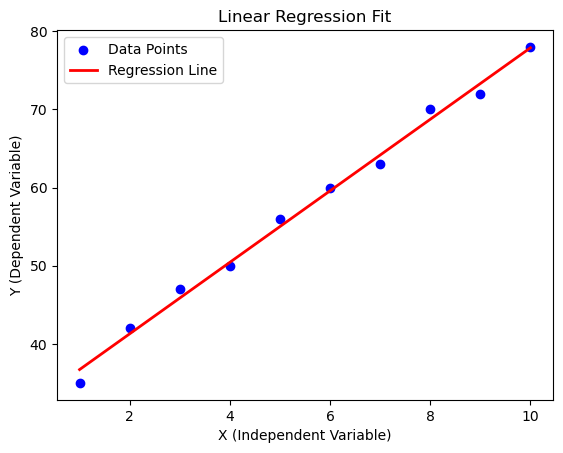

In [4]:
# Sample dataset: Experience (Years) vs Salary ($1000s)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Feature (Years of Experience)
Y = np.array([35, 42, 47, 50, 56, 60, 63, 70, 72, 78])  # Target (Salary in $1000s)

# Create and train the model
model = LinearRegression()
model.fit(X, Y)

# Make predictions
predictions = model.predict(X)

# Evaluate the model
metrics = model.evaluate(X, Y)
print(f"Model Performance: {metrics}")

# Plot the regression line
model.plot_regression_line(X, Y)

---

### Regularization (Ridge, Lasso, and Elastic Net)

#### 1. Why Do We Need Regularization?

When using **Multiple Linear Regression**, we may encounter the following problems:
- **Overfitting** → Model captures noise instead of true relationships
- **Multicollinearity** → Features are highly correlated, leading to unstable coefficients
- **Large Coefficients** → Extreme values for $\beta$ make the model sensitive to small changes in data

**Regularization** adds a penalty to the regression coefficients, preventing them from growing too large. This improves **generalization** and makes the model more robust.

#### 2. Ridge Regression (L2 Regularization)

Instead of minimizing only the **Residual Sum of Squares (RSS)**, Ridge Regression **adds a penalty** on the sum of squared coefficients:

$\text{Cost Function} = \sum (Y_i - \hat{Y}_i)^2 + \lambda \sum \beta_j^2$

where $\lambda$ is a hyperparameter that controls regularization strength:
- $\lambda = 0$ → Ridge is equivalent to OLS (no regularization)
- **High** $\lambda$ → Forces coefficients closer to **zero**, reducing overfitting

**Solution using matrix algebra:**

$\beta = (X^T X + \lambda I)^{-1} X^T Y$

where $I$ is an identity matrix that shrinks coefficients.

#### 3. Lasso Regression (L1 Regularization)

Lasso (Least Absolute Shrinkage and Selection Operator) **penalizes the absolute values** of the coefficients:

$\text{Cost Function} = \sum (Y_i - \hat{Y}_i)^2 + \lambda \sum |\beta_j|$

**Key Difference from Ridge:**
- Lasso can **shrink some coefficients to exactly zero**, leading to **feature selection**
- Ridge **reduces coefficient size but never sets them to zero**

**Why use Lasso?**
- If you want to **remove irrelevant features** automatically, use Lasso
- If you have **many correlated variables**, Lasso will keep only the most important ones

#### 4. Elastic Net (Combination of Ridge & Lasso)

Elastic Net combines both **L1 and L2 penalties**:

$\text{Cost Function} = \sum (Y_i - \hat{Y}_i)^2 + \lambda_1 \sum |\beta_j| + \lambda_2 \sum \beta_j^2$

- Works well when **features are correlated**
- Combines **Lasso's feature selection** with **Ridge's stability**

In [5]:
import numpy as np

class RegularizedLinearRegression:
    """
    Implements Ridge, Lasso, and Elastic Net Regression using the Normal Equation.
    """
    def __init__(self, method="ridge", alpha=1.0, l1_ratio=0.5):
        """
        :param method: "ridge", "lasso", or "elastic_net"
        :param alpha: Regularization strength (lambda)
        :param l1_ratio: Ratio between L1 (lasso) and L2 (ridge) penalties (only for Elastic Net)
        """
        self.method = method
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.beta = None  # Model coefficients

    def fit(self, X, Y):
        """
        Fits the model to the training data.
        :param X: Feature matrix (n_samples, n_features)
        :param Y: Target values (n_samples,)
        """
        X = np.c_[np.ones(X.shape[0]), X]  # Add intercept term
        n_features = X.shape[1]
        
        if self.method == "ridge":
            I = np.eye(n_features)
            I[0, 0] = 0  # Don't regularize intercept
            self.beta = np.linalg.inv(X.T @ X + self.alpha * I) @ X.T @ Y

        elif self.method == "lasso":
            from sklearn.linear_model import Lasso
            model = Lasso(alpha=self.alpha, fit_intercept=True)
            model.fit(X, Y)
            self.beta = np.insert(model.coef_[1:], 0, model.intercept_)  # Store intercept separately

        elif self.method == "elastic_net":
            from sklearn.linear_model import ElasticNet
            model = ElasticNet(alpha=self.alpha, l1_ratio=self.l1_ratio, fit_intercept=True)
            model.fit(X, Y)
            self.beta = np.insert(model.coef_[1:], 0, model.intercept_)  # Store intercept separately

        else:
            raise ValueError("Method must be 'ridge', 'lasso', or 'elastic_net'")

    def predict(self, X):
        """
        Predicts values using the trained model.
        :param X: Feature matrix (n_samples, n_features)
        :return: Predicted values
        """
        X = np.c_[np.ones(X.shape[0]), X]  # Add intercept term
        return X @ self.beta

    def evaluate(self, X, Y):
        """
        Computes MSE and R² score.
        :param X: Feature matrix (n_samples, n_features)
        :param Y: True target values
        :return: Dictionary with MSE and R²
        """
        Y_pred = self.predict(X)
        mse = np.mean((Y - Y_pred) ** 2)
        r2_score = 1 - (np.sum((Y - Y_pred) ** 2) / np.sum((Y - np.mean(Y)) ** 2))
        return {"MSE": mse, "R²": r2_score}

#### Testing Regularized Regression Models:

Let’s use the house price dataset again.

In [6]:
# Example dataset: Predicting house prices based on Size, Bedrooms, and Age
X = np.array([
    [1400, 3, 10],
    [1600, 4, 5],
    [1700, 3, 20],
    [1875, 2, 30],
    [1100, 2, 15]
])
Y = np.array([245000, 312000, 279000, 308000, 199000])  # House prices

# Train Ridge Regression
ridge_model = RegularizedLinearRegression(method="ridge", alpha=10)
ridge_model.fit(X, Y)
print("Ridge Performance:", ridge_model.evaluate(X, Y))

# Train Lasso Regression
lasso_model = RegularizedLinearRegression(method="lasso", alpha=10)
lasso_model.fit(X, Y)
print("Lasso Performance:", lasso_model.evaluate(X, Y))

# Train Elastic Net Regression
elastic_model = RegularizedLinearRegression(method="elastic_net", alpha=10, l1_ratio=0.5)
elastic_model.fit(X, Y)
print("Elastic Net Performance:", elastic_model.evaluate(X, Y))

Ridge Performance: {'MSE': np.float64(86606862.69987607), 'R²': np.float64(0.9515903150852546)}
Lasso Performance: {'MSE': np.float64(72663314.70794983), 'R²': np.float64(0.9593841866543231)}
Elastic Net Performance: {'MSE': np.float64(87990621.95313627), 'R²': np.float64(0.9508168504040512)}


#### Key Assumptions of Linear Regression

| Assumption | Description |
|------------|-------------|
| **1. Linearity** | The relationship between X and Y must be linear. |
| **2. Independence** | Errors should not be correlated (important for time series). |
| **3. No Multicollinearity** | Predictors should not be highly correlated. |
| **4. Homoscedasticity** | Errors should have **constant variance**. |
| **5. Normality of Residuals** | Residuals (errors) should be normally distributed. |

#### Checking for Assumption Violations

#### 1. Linearity (Relationship between X & Y should be linear)

**Why is this important?** 
If the relationship between **predictors and response** is **non-linear**, linear regression won't capture it well.

**How to detect?**

- **Scatter plot**: 
 - Look for a **straight-line** pattern between X and Y

- **Residual vs. Fitted plot**: 
 - Residuals should be **randomly scattered** (no patterns)

In [14]:
# !pip install statsmodels

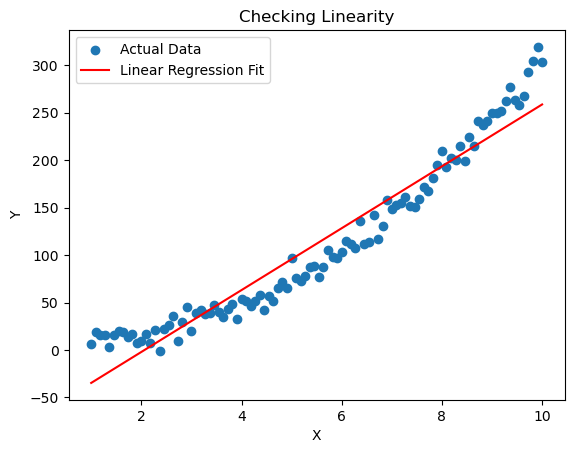

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic non-linear data
X = np.linspace(1, 10, 100).reshape(-1, 1)
Y = 3 * (X ** 2) + np.random.normal(0, 10, size=X.shape)  # Quadratic relationship

# Fit Linear Regression Model
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Plot actual vs predicted
plt.scatter(X, Y, label="Actual Data")
plt.plot(X, Y_pred, color="red", label="Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Checking Linearity")
plt.show()

#### Interpretation and Solutions

**Interpretation**:
- If the red regression line **does not fit the data well**, the relationship is non-linear.

**How to fix it?**

- Use **Polynomial Regression**:
 - Transform X to $X^2$, $X^3$, etc.
 
- Apply **logarithmic or exponential transformations**

#### 2. Independence of Errors (Autocorrelation)

**📌 Why is this important?**
Errors should not be correlated. This is especially crucial in time-series data, where past errors may influence future ones.

**🔹 How to detect?**

- **Durbin-Watson Test:** Detects autocorrelation. Values close to 2 mean no correlation.
- **Residual Plot:** Residuals should be randomly scattered.

**🔹 Python Implementation:**

In [11]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample dataset
data = pd.DataFrame({
    "size": [1400, 1600, 1700, 1875, 1100],  # House size
    "bedrooms": [3, 4, 3, 2, 2],  # Bedrooms
    "age": [10, 5, 20, 30, 15]  # House age
})

# Compute correlation matrix
print("Correlation Matrix:\n", data.corr())

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
print("\nVariance Inflation Factor (VIF):\n", vif_data)

Correlation Matrix:
               size  bedrooms       age
size      1.000000  0.160595  0.519527
bedrooms  0.160595  1.000000 -0.745644
age       0.519527 -0.745644  1.000000

Variance Inflation Factor (VIF):
     Feature         VIF
0      size  377.842930
1  bedrooms  153.850767
2       age   71.840805


**✅ Interpretation:**

- Close to 2 → No autocorrelation ✅
- Close to 0 or 4 → Strong autocorrelation ❌

**🔹 How to fix it?**

- Use ARIMA models for time-series data.
- Add lagged variables as predictors.

#### 3. Multicollinearity (When Predictors Are Highly Correlated)

**📌 Why is this important?**

If two predictors are highly correlated, their individual effects on \( Y \) become hard to distinguish. This makes coefficient estimates unstable and unreliable.

**🔹 How to detect?**

- **Correlation matrix:** Check pairwise correlations.
- **Variance Inflation Factor (VIF):** High VIF means multicollinearity.

**🔹 Python Implementation:**

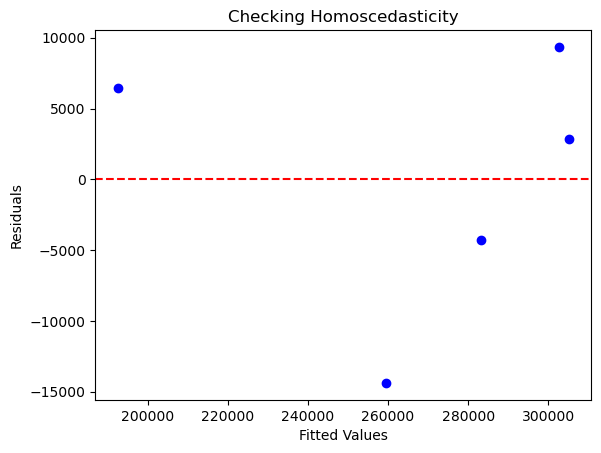

Breusch-Pagan Test p-value: 0.38895662131620545


In [13]:
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample Data
X = np.array([[1400, 3, 10], [1600, 4, 5], [1700, 3, 20], [1875, 2, 30], [1100, 2, 15]])
Y = np.array([245000, 312000, 279000, 308000, 199000])

# Fit Linear Regression
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Residual Plot
plt.scatter(Y_pred, Y - Y_pred, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Checking Homoscedasticity")
plt.show()

# **Fix**: Add a constant column to X
X_with_const = sm.add_constant(X)  # Adds intercept column

# Breusch-Pagan test
_, p_value, _, _ = smd.het_breuschpagan(Y - Y_pred, X_with_const)
print(f"Breusch-Pagan Test p-value: {p_value}")

✅ Interpretation:

* VIF < 5 → No multicollinearity ✅
* VIF > 10 → Severe multicollinearity ❌

🔹 How to fix it?

* Remove one of the correlated variables.
* Use Principal Component Analysis (PCA) to create uncorrelated components.
* Use Ridge Regression, which can handle multicollinearity.

#### 4. Homoscedasticity (Constant Variance of Errors)

**📌 Why is this important?**

The spread of residuals should not increase or decrease as \( X \) increases.

**🔹 How to detect?**

- **Residual vs. Fitted Plot:** Residuals should be randomly scattered.
- **Breusch-Pagan Test:** Detects heteroscedasticity.

**🔹 Python Implementation:**

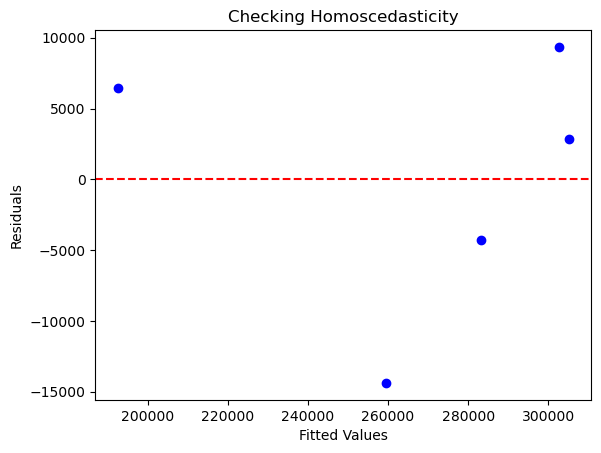

Breusch-Pagan Test p-value: 0.38895662131620545


In [16]:
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample Data
X = np.array([[1400, 3, 10], [1600, 4, 5], [1700, 3, 20], [1875, 2, 30], [1100, 2, 15]])
Y = np.array([245000, 312000, 279000, 308000, 199000])

# Fit Linear Regression
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Residual Plot
plt.scatter(Y_pred, Y - Y_pred, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Checking Homoscedasticity")
plt.show()

# **Fix**: Add a constant column to X
X_with_const = sm.add_constant(X)  # Adds intercept column

# Breusch-Pagan test
_, p_value, _, _ = smd.het_breuschpagan(Y - Y_pred, X_with_const)
print(f"Breusch-Pagan Test p-value: {p_value}")

**✅ Explanation of Fix**

- `sm.add_constant(X)` → This adds an intercept column (a column of ones).
- Pass `X_with_const` instead of `X` → The Breusch-Pagan test now has a proper design matrix.

**Interpretation of p-value:**

- p-value > 0.05 → No heteroscedasticity (good).
- p-value < 0.05 → Heteroscedasticity detected (bad, requires transformation).